## Load and Combine Datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
%ls

 98-401-X2021013_English_CSV_data.csv   ontario_evs_by_fsa_2023-03-31.csv
 data.csv                              'Untitled Folder'/
'EVON_notebook (1).ipynb'               Untitled.ipynb
 newdata.csv


The Census Profile contains over 2600 "characteristics" for each region, stored in a one-row-per-characteristic format, with columns representing various metadata and breakdowns by gender. In this section, we will select only those characteristics that correspond to our desired feature domains (age, housing, income, family & citizenship, education, employment, and commuting patterns). These are then normalized over the population/dwelling count, and transposed into the expected columnar format for further analysis as features.
Characteristics in the Census Profile often have a hierarchical structure, and the provided names may not make sense outside of this. We will rename these variables in order to properly reflect their meaning.

In [3]:
# Assigning meaningful variable names to Census Profile characteristics in place of numeric IDs
all_vars = ["total_pop","total_dwellings","num_male",
     "age_25","age_30","age_35","age_40","age_45","age_50","age_55","age_60","age_65_up","age_mean","age_med",
     "homes_detached_house","homes_semidetached_house","homes_rowhouse","homes_duplex_apt","homes_lowrise_apt",
     "homes_highrise_apt","homes_other_stationary","homes_mobile",
     "avg_ppl_household","married_ppl","single_ppl",
     "avg_total_income","avg_aftertax_income","med_fulltime_income","avg_fulltime_income",
     "income_none","income_under_10k","income_10k","income_20k","income_30k","income_40k","income_50k","income_60k",
     "income_70k","income_80k","income_90k","income_100k_up",
     "med_total_household_income","med_aftertax_household_income",
     "indigenous_ppl","nonindigenous_ppl",
     "home_owner","home_renter","home_gov_or_ind_band",
     "condo","non_condo","avg_rooms_home",
     "home_cost_under_30pct","home_cost_over_30pct",
     "can_citizen_ppl","non_citizen_ppl",
     "non_immigrant_ppl","immigrant_ppl","non_perm_res_ppl",
     "no_move_last_yr","moved_last_yr","no_move_5yrs","moved_last_5yrs",
     "school_no_hs","school_hs","school_college","school_uni_degree",
     "edu_field_education","edu_field_arts_comms","edu_field_humanities","edu_field_socsci_law","edu_field_bus_admin",
     "edu_field_science","edu_field_math_cs","edu_field_engin_arch","edu_field_agri_res_env","edu_field_health",
     "edu_field_pers_protect_transp","edu_field_other",
     "workforce_participation_rate","workforce_employment_rate","workforce_unemployment_rate",
     "work_lastyear_didnotwork","work_lastyear_worked","work_lastyear_fulltime","work_lastyear_parttime","work_lastyear_avg_weeks",
     "worktype_employee","worktype_selfemp",
     "occup_cat_snr_mgmt","occup_cat_busfin","occup_cat_science","occup_cat_health","occup_cat_edu_law_socserv","occup_cat_arts_rec",
     "occup_cat_sales_serv","occup_cat_trades_transp","occup_cat_natres_agr","occup_cat_manuf_util",
     "occup_ind_agr_forest","occup_ind_mine_og","occup_ind_util","occup_ind_constr","occup_ind_manuf","occup_ind_wholesale_trd",
     "occup_ind_retail_trd","occup_ind_transp_warehs","occup_ind_info_culture","occup_ind_fin_insure","occup_ind_realestate",
     "occup_ind_prof_sci_tech_serv","occup_ind_mgmt","occup_ind_admsupport_wastemgmt","occup_ind_edu","occup_ind_health_socasst",
     "occup_ind_arts_ent_rec","occup_ind_accom_food_svc","occup_ind_other","occup_ind_pubadmin",
     "work_loc_home","work_loc_foreign","work_loc_notfixed","work_loc_workplace",
     "commute_same_subdiv","commute_same_div","commute_same_prov","commute_diff_prov",
     "commute_transp_cardriver","commute_transp_carpass","commute_transp_pubtrans","commute_transp_walk",
     "commute_transp_bike","commute_transp_other",
     "commute_time_under15","commute_time_15","commute_time_30","commute_time_45","commute_time_over60",
     "commute_start_5am","commute_start_6am","commute_start_7am","commute_start_8am","commute_start_9am","commute_start_noon"]

var_names = dict(zip(
    [1,4,8,16,17,18,19,20,21,22,23,24,39,40,
     42,43,44,45,46,47,48,49,57,59,66,128,130,143,144,
     156,158,159,160,161,162,163,164,165,166,167,168,
     243,244,1403,1410,1415,1416,1417,1419,1420,1433,
     1466,1467,1523,1526,1528,1529,1537,1975,1976,1984,1985,
     2015,2016,2018,2024,2095,2097,2100,2109,2117,2121,2127,2132,2140,2143,
     2149,2155,2228,2229,2230,2232,2233,2234,2235,2236,2240,2245,
     2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,
     2262,2263,2264,2265,2266,2267,2268,2269,2270,
     2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,
     2594,2595,2596,2597,
     2599,2600,2601,2602,
     2605,2606,2607,2608,2609,2610,
     2612,2613,2614,2615,2616,
     2618,2619,2620,2621,2622,2623],
    all_vars
))

# Divide variables into those that represent counts of people and dwellings, in order to divide by the appropriate value
ppl_vars = ["num_male","age_25","age_30","age_35","age_40","age_45","age_50","age_55","age_60","age_65_up",
            "married_ppl","single_ppl","income_none","income_under_10k","income_10k","income_20k","income_30k",
            "income_40k","income_50k","income_60k","income_70k","income_80k","income_90k","income_100k_up",
            "indigenous_ppl","nonindigenous_ppl","home_owner","home_renter","home_gov_or_ind_band",
            "home_cost_under_30pct","home_cost_over_30pct","can_citizen_ppl","non_citizen_ppl","non_immigrant_ppl",
            "immigrant_ppl","non_perm_res_ppl","no_move_last_yr","moved_last_yr","no_move_5yrs","moved_last_5yrs",
            "school_no_hs","school_hs","school_college","school_uni_degree","edu_field_education","edu_field_arts_comms",
            "edu_field_humanities","edu_field_socsci_law","edu_field_bus_admin","edu_field_science","edu_field_math_cs",
            "edu_field_engin_arch","edu_field_agri_res_env","edu_field_health","edu_field_pers_protect_transp","edu_field_other",
            "work_lastyear_didnotwork","work_lastyear_worked","work_lastyear_fulltime","work_lastyear_parttime","work_lastyear_avg_weeks",
            "worktype_employee","worktype_selfemp","occup_cat_snr_mgmt","occup_cat_busfin","occup_cat_science","occup_cat_health",
            "occup_cat_edu_law_socserv","occup_cat_arts_rec","occup_cat_sales_serv","occup_cat_trades_transp","occup_cat_natres_agr",
            "occup_cat_manuf_util","occup_ind_agr_forest","occup_ind_mine_og","occup_ind_util","occup_ind_constr","occup_ind_manuf",
            "occup_ind_wholesale_trd","occup_ind_retail_trd","occup_ind_transp_warehs","occup_ind_info_culture","occup_ind_fin_insure",
            "occup_ind_realestate","occup_ind_prof_sci_tech_serv","occup_ind_mgmt","occup_ind_admsupport_wastemgmt","occup_ind_edu",
            "occup_ind_health_socasst","occup_ind_arts_ent_rec","occup_ind_accom_food_svc","occup_ind_other","occup_ind_pubadmin",
            "work_loc_home","work_loc_foreign","work_loc_notfixed","work_loc_workplace","commute_same_subdiv","commute_same_div",
            "commute_same_prov","commute_diff_prov","commute_transp_cardriver","commute_transp_carpass","commute_transp_pubtrans",
            "commute_transp_walk","commute_transp_bike","commute_transp_other","commute_time_under15","commute_time_15",
            "commute_time_30","commute_time_45","commute_time_over60","commute_start_5am","commute_start_6am","commute_start_7am",
            "commute_start_8am","commute_start_9am","commute_start_noon"]
dwelling_vars = ["homes_detached_house","homes_semidetached_house","homes_rowhouse","homes_duplex_apt","homes_lowrise_apt",
                 "homes_highrise_apt","homes_other_stationary","homes_mobile","condo","non_condo"]

In [4]:
# Load Census Profile data
census_data = pd.read_csv('98-401-X2021013_English_CSV_data.csv', encoding="iso-8859-1")

In [20]:
# Filter to Ontario FSAs/postal codes
census_data = census_data[census_data['GEO_NAME'].str.match(r'K|L|M|N|P')]

# Drop extra columns
census_data = census_data[["GEO_NAME","CHARACTERISTIC_ID","C1_COUNT_TOTAL","C2_COUNT_MEN+"]]

# Use the number of men for the "num_male" value, otherwise just take the total
census_data['value'] = census_data.apply(lambda row: row['C2_COUNT_MEN+'] if row['CHARACTERISTIC_ID']==8 else row['C1_COUNT_TOTAL'], axis=1)

# Select only those rows corresponding to the characteristics we want
census_data = census_data.loc[census_data['CHARACTERISTIC_ID'].isin(var_names.keys())]

# Add in the variable names
census_data['varname'] = census_data.apply(lambda row: var_names[row['CHARACTERISTIC_ID']], axis=1)

# Pivot/transpose
census_data = census_data.pivot(index='GEO_NAME', columns='varname', values='value')

KeyError: 'GEO_NAME'

In [6]:
# Load the EV data
ev_data = pd.read_csv("ontario_evs_by_fsa_2023-03-31.csv")

In [19]:
# Join EV and census data by FSA
census_data = census_data.merge(ev_data, left_on='GEO_NAME', right_on='FSA', how='inner')

# Normalize data for individuals over the population
for var in ppl_vars:
    census_data[var] = census_data[var]/census_data['total_pop']

# Normalize data for homes over dwelling count
for var in dwelling_vars:
    census_data[var] = census_data[var]/census_data['total_dwellings']

# Normalize EV data over population, and calculate per-10,000
census_data['BEV'] = (census_data['BEV']/census_data['total_pop'])*10000
census_data['PHEV'] = (census_data['PHEV']/census_data['total_pop'])*10000
census_data['TotalEV'] = (census_data['TotalEV']/census_data['total_pop'])*10000

KeyError: 'GEO_NAME'

In [8]:
# Clean up - reorder the columns
all_vars.insert(0, 'FSA')
all_vars.extend(['BEV','PHEV','TotalEV'])
data = census_data[all_vars]

data.to_csv("newdata.csv")

## Feature Selection

Now that the dataset is assembled, we will examine its structure, and select features from each domain that best correlate with our target variable.

In [21]:
data = pd.read_csv("newdata.csv")

In [22]:
df = pd.DataFrame(data)

In [23]:
df.head()

Unnamed: 0  FSA  total_pop  total_dwellings  num_male    age_25    age_30  \
0           0  K0A   111626.0          43737.0  0.502258  0.049630  0.061545   
1           1  K0B    21020.0           9489.0  0.504282  0.053996  0.054472   
2           2  K0C    52838.0          22714.0  0.498978  0.050248  0.053749   
3           3  K0E    39649.0          18426.0  0.499887  0.049434  0.051704   
4           4  K0G    39862.0          19411.0  0.496839  0.042396  0.051553   

     age_35    age_40    age_45  ...  commute_time_over60  commute_start_5am  \
0  0.063964  0.063336  0.065487  ...             0.021411           0.035341   
1  0.048763  0.049001  0.059467  ...             0.051618           0.049001   
2  0.052519  0.053371  0.056683  ...             0.035107           0.047504   
3  0.051451  0.051451  0.059901  ...             0.033292           0.039724   
4  0.055190  0.051804  0.058703  ...             0.032487           0.039135   

   commute_start_6am  commute_start_7am  commute_start_8am  commute_start_9am  \
0           0.092004           0.097424           0.053482           0.026204   
1           0.086108           0.104900           0.062084           0.021646   
2           0.090465           0.098509           0.053371           0.024982   
3           0.098237           0.101894           0.055739           0.028374   
4           0.081531           0.089684           0.054438           0.029978   

   commute_start_noon        BEV       PHEV    TotalEV  
0            0.038477  60.380198  28.040062  88.420261  
1            0.050428  30.922931  25.689819  56.612750  
2            0.057440  28.199402  17.600969  45.800371  
3            0.045272  26.482383  17.150496  43.632879  
4            0.038382  49.169635  24.584818  73.754453  

[5 rows x 148 columns]

In [24]:
# To find the columns with the highest correlation to TotalEV, we first need to compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Now, we extract the correlations of all features with respect to 'TotalEV'
total_ev_correlations = correlation_matrix['TotalEV'].sort_values(ascending=False)

In [25]:
pd.set_option('display.max_rows', len(total_ev_correlations))
display(total_ev_correlations)

TotalEV                           1.000000
BEV                               0.999350
PHEV                              0.994720
med_fulltime_income               0.671854
avg_fulltime_income               0.474435
income_100k_up                    0.462874
occup_cat_snr_mgmt                0.438262
avg_aftertax_income               0.431622
avg_total_income                  0.429318
occup_cat_busfin                  0.402353
work_loc_home                     0.400810
med_total_household_income        0.392518
work_lastyear_avg_weeks           0.389729
med_aftertax_household_income     0.374548
occup_ind_realestate              0.374130
school_uni_degree                 0.373412
occup_ind_prof_sci_tech_serv      0.364094
income_80k                        0.360097
edu_field_science                 0.352018
edu_field_bus_admin               0.351657
worktype_selfemp                  0.342629
income_90k                        0.330989
occup_ind_fin_insure              0.329573
occup_cat_s

From the available features, we will select those in our different domains with highest positive or negative correlations.

In [26]:
selected_features = ["FSA", "med_fulltime_income","income_100k_up", "med_total_household_income", "income_40k", "occup_cat_snr_mgmt","occup_cat_busfin","occup_ind_realestate" ,"work_loc_home","work_loc_workplace", "work_loc_notfixed", "school_uni_degree", "school_hs", "commute_start_noon" , "edu_field_science","edu_field_bus_admin", "edu_field_health", "edu_field_pers_protect_transp","commute_transp_carpass","commute_start_6am","commute_start_9am", "condo", "worktype_selfemp", "indigenous_ppl", "married_ppl", "work_loc_foreign", "can_citizen_ppl", "non_citizen_ppl", "TotalEV"]

In [27]:
df_new = df[selected_features]

In [28]:
df_new.to_csv("data.csv")

## Data Ingestion Pipeline

In [ ]:
!pip install plotly

In [30]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [31]:
#Initiating the libraries
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [32]:
#Reading the csv file and adding it to the variable data
data = pd.read_csv("data.csv")

In [33]:
pd.set_option('display.max_columns', None) #For exploratory analysis we set this feature to view all the rows and columns of the dataframe
pd.set_option("display.max_rows", None)
df = pd.DataFrame(data)
df.head(15)

Unnamed: 0  FSA  med_fulltime_income  income_100k_up  \
0            0  K0A              74500.0        0.127076   
1            1  K0B              56800.0        0.063511   
2            2  K0C              58800.0        0.066429   
3            3  K0E              58000.0        0.063558   
4            4  K0G              64500.0        0.094451   
5            5  K0H              64000.0        0.082900   
6            6  K0J              60000.0        0.071091   
7            7  K0K              58800.0        0.069055   
8            8  K0L              59200.0        0.069489   
9            9  K0M              58800.0        0.074422   
10          10  K1A                  NaN        0.075758   
11          11  K1B              65500.0        0.084135   
12          12  K1C              78500.0        0.134417   
13          13  K1E              71000.0        0.104770   
14          14  K1G              68000.0        0.090665   

    med_total_household_income  income_40k  occup_cat_snr_mgmt  \
0                     115000.0    0.078879            0.009093   
1                      79000.0    0.098002            0.006422   
2                      84000.0    0.096143            0.004542   
3                      83000.0    0.102525            0.004162   
4                      94000.0    0.092569            0.006648   
5                      92000.0    0.090302            0.005393   
6                      76000.0    0.089738            0.003933   
7                      83000.0    0.096763            0.004489   
8                      79000.0    0.100522            0.005055   
9                      80000.0    0.098950            0.006132   
10                     73500.0    0.109428            0.000000   
11                     96000.0    0.089200            0.005346   
12                    117000.0    0.073855            0.005506   
13                    110000.0    0.084781            0.005859   
14                     83000.0    0.083253            0.003706   

    occup_cat_busfin  occup_ind_realestate  work_loc_home  work_loc_workplace  \
0           0.104232              0.007256       0.170659            0.267635   
1           0.083968              0.003806       0.099905            0.305661   
2           0.075798              0.004826       0.091317            0.306692   
3           0.070115              0.006558       0.078060            0.299629   
4           0.080904              0.008906       0.124931            0.264287   
5           0.070211              0.007508       0.096857            0.271539   
6           0.050114              0.004225       0.071966            0.266593   
7           0.057747              0.006388       0.084463            0.274493   
8           0.059827              0.007102       0.083630            0.252553   
9           0.063179              0.009198       0.082877            0.240360   
10          0.042088              0.000000       0.058923            0.067340   
11          0.111430              0.009286       0.162924            0.250999   
12          0.119377              0.006848       0.188129            0.220089   
13          0.122346              0.004825       0.172663            0.230218   
14          0.092804              0.006985       0.173348            0.232651   

    work_loc_notfixed  school_uni_degree  school_hs  commute_start_noon  \
0            0.075341           0.147770   0.131869            0.038477   
1            0.068744           0.080875   0.168411            0.050428   
2            0.065578           0.079488   0.150744            0.057440   
3            0.069737           0.074907   0.154733            0.045272   
4            0.068988           0.111510   0.138979            0.038382   
5            0.059108           0.100664   0.147824            0.033731   
6            0.058417           0.080124   0.151215            0.037148   
7            0.062840           0.081657   0.152482            0.047605   
8            0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     518 non-null    int64  
 1   FSA                            518 non-null    object 
 2   med_fulltime_income            514 non-null    float64
 3   income_100k_up                 515 non-null    float64
 4   med_total_household_income     515 non-null    float64
 5   income_40k                     515 non-null    float64
 6   occup_cat_snr_mgmt             515 non-null    float64
 7   occup_cat_busfin               515 non-null    float64
 8   occup_ind_realestate           515 non-null    float64
 9   work_loc_home                  515 non-null    float64
 10  work_loc_workplace             515 non-null    float64
 11  work_loc_notfixed              515 non-null    float64
 12  school_uni_degree              515 non-null    flo

In [35]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     518 non-null    Int64  
 1   FSA                            518 non-null    string 
 2   med_fulltime_income            514 non-null    Int64  
 3   income_100k_up                 515 non-null    Float64
 4   med_total_household_income     515 non-null    Int64  
 5   income_40k                     515 non-null    Float64
 6   occup_cat_snr_mgmt             515 non-null    Float64
 7   occup_cat_busfin               515 non-null    Float64
 8   occup_ind_realestate           515 non-null    Float64
 9   work_loc_home                  515 non-null    Float64
 10  work_loc_workplace             515 non-null    Float64
 11  work_loc_notfixed              515 non-null    Float64
 12  school_uni_degree              515 non-null    Flo

### Missing Values

In this section, we will check for missing values. The nature of our data source is such that these should be present, except when the population size is insufficient to gather statistical data. In these cases, we will most likely want to remove the region from consideration.

In [36]:
df[df.isna().any(axis=1)]

Unnamed: 0  FSA  med_fulltime_income  income_100k_up  \
10           10  K1A                 <NA>        0.075758   
158         158  L4V                 <NA>            <NA>   
175         175  L5S                 <NA>            <NA>   
176         176  L5T                 <NA>            <NA>   

     med_total_household_income  income_40k  occup_cat_snr_mgmt  \
10                        73500    0.109428                 0.0   
158                        <NA>        <NA>                <NA>   
175                        <NA>        <NA>                <NA>   
176                        <NA>        <NA>                <NA>   

     occup_cat_busfin  occup_ind_realestate  work_loc_home  \
10           0.042088                   0.0       0.058923   
158              <NA>                  <NA>           <NA>   
175              <NA>                  <NA>           <NA>   
176              <NA>                  <NA>           <NA>   

     work_loc_workplace  work_loc_notfixed  school_uni_degree  school_hs  \
10              0.06734                0.0           0.058923   0.042088   
158                <NA>               <NA>               <NA>       <NA>   
175                <NA>               <NA>               <NA>       <NA>   
176                <NA>               <NA>               <NA>       <NA>   

     commute_start_noon  edu_field_science  edu_field_bus_admin  \
10                  0.0           0.016835             0.025253   
158                <NA>               <NA>                 <NA>   
175                <NA>               <NA>                 <NA>   
176                <NA>               <NA>                 <NA>   

     edu_field_health  edu_field_pers_protect_transp  commute_transp_carpass  \
10                0.0                            0.0                     0.0   
158              <NA>                           <NA>                    <NA>   
175              <NA>                           <NA>                    <NA>   
176              <NA>                           <NA>                    <NA>   

     commute_start_6am  commute_start_9am     condo  worktype_selfemp  \
10            0.016835                0.0  0.108173           0.03367   
158               <NA>               <NA>      <NA>              <NA>   
175               <NA>               <NA>      <NA>              <NA>   
176               <NA>               <NA>      <NA>              <NA>   

     indigenous_ppl  married_ppl  work_loc_foreign  can_citizen_ppl  \
10         0.016835     0.479798               0.0         0.808081   
158            <NA>         <NA>              <NA>             <NA>   
175            <NA>         <NA>              <NA>             <NA>   
176            <NA>         <NA>              <NA>             <NA>   

     non_citizen_ppl       TotalEV  
10          0.050505   1414.141414  
158             <NA>      102000.0  
175             <NA>  22962.962963  
176             <NA>  57368.421053

In [37]:
index_label = [10,158,175,176] #We are removing null values here and the TotalEV bias that you can see above

In [38]:
df = df.drop(index_label)

In [39]:
df = df.drop('Unnamed: 0', axis=1) #We are dropping the duplicate index feature here.

In [40]:
df.isna().sum()

FSA                              0
med_fulltime_income              0
income_100k_up                   0
med_total_household_income       0
income_40k                       0
occup_cat_snr_mgmt               0
occup_cat_busfin                 0
occup_ind_realestate             0
work_loc_home                    0
work_loc_workplace               0
work_loc_notfixed                0
school_uni_degree                0
school_hs                        0
commute_start_noon               0
edu_field_science                0
edu_field_bus_admin              0
edu_field_health                 0
edu_field_pers_protect_transp    0
commute_transp_carpass           0
commute_start_6am                0
commute_start_9am                0
condo                            0
worktype_selfemp                 0
indigenous_ppl                   0
married_ppl                      0
work_loc_foreign                 0
can_citizen_ppl                  0
non_citizen_ppl                  0
TotalEV             

In [41]:
df.loc[0]

FSA                                    K0A
med_fulltime_income                  74500
income_100k_up                    0.127076
med_total_household_income          115000
income_40k                        0.078879
occup_cat_snr_mgmt                0.009093
occup_cat_busfin                  0.104232
occup_ind_realestate              0.007256
work_loc_home                     0.170659
work_loc_workplace                0.267635
work_loc_notfixed                 0.075341
school_uni_degree                  0.14777
school_hs                         0.131869
commute_start_noon                0.038477
edu_field_science                 0.013841
edu_field_bus_admin                0.06916
edu_field_health                  0.047794
edu_field_pers_protect_transp      0.02598
commute_transp_carpass            0.021276
commute_start_6am                 0.092004
commute_start_9am                 0.026204
condo                             0.026865
worktype_selfemp                  0.082911
indigenous_

In [42]:
df.head()

FSA  med_fulltime_income  income_100k_up  med_total_household_income  \
0  K0A                74500        0.127076                      115000   
1  K0B                56800        0.063511                       79000   
2  K0C                58800        0.066429                       84000   
3  K0E                58000        0.063558                       83000   
4  K0G                64500        0.094451                       94000   

   income_40k  occup_cat_snr_mgmt  occup_cat_busfin  occup_ind_realestate  \
0    0.078879            0.009093          0.104232              0.007256   
1    0.098002            0.006422          0.083968              0.003806   
2    0.096143            0.004542          0.075798              0.004826   
3    0.102525            0.004162          0.070115              0.006558   
4    0.092569            0.006648          0.080904              0.008906   

   work_loc_home  work_loc_workplace  work_loc_notfixed  school_uni_degree  \
0       0.170659            0.267635           0.075341            0.14777   
1       0.099905            0.305661           0.068744           0.080875   
2       0.091317            0.306692           0.065578           0.079488   
3        0.07806            0.299629           0.069737           0.074907   
4       0.124931            0.264287           0.068988            0.11151   

   school_hs  commute_start_noon  edu_field_science  edu_field_bus_admin  \
0   0.131869            0.038477           0.013841              0.06916   
1   0.168411            0.050428           0.007136             0.052331   
2   0.150744             0.05744           0.007949             0.051383   
3   0.154733            0.045272           0.007062             0.055361   
4   0.138979            0.038382           0.010035             0.059455   

   edu_field_health  edu_field_pers_protect_transp  commute_transp_carpass  \
0          0.047794                        0.02598                0.021276   
1          0.045671                       0.026641                0.017602   
2          0.052141                       0.026212                0.020156   
3          0.048803                       0.034301                0.018412   
4          0.050173                       0.028097                0.021574   

   commute_start_6am  commute_start_9am     condo  worktype_selfemp  \
0           0.092004           0.026204  0.026865          0.082911   
1           0.086108           0.021646  0.037412          0.092531   
2           0.090465           0.024982  0.013868          0.076555   
3           0.098237           0.028374  0.008955          0.073772   
4           0.081531           0.029978  0.015713          0.089308   

   indigenous_ppl  married_ppl  work_loc_foreign  can_citizen_ppl  \
0        0.040895     0.554754          0.000806         0.971234   
1        0.031874     0.543292          0.000476         0.960514   
2        0.034161     0.538154          0.000852         0.967202   
3        0.031274     0.549825          0.001639         0.981614   
4        0.033992     0.564573          0.001631         0.970097   

   non_citizen_ppl    TotalEV  
0         0.015677  88.420261  
1         0.015224   56.61275  
2         0.013437  45.800371  
3         0.013241  43.632879  
4          0.01455  73.754453

## Continuous Features report

In [43]:
def build_continuous_features_report(data_df):
    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [44]:
build_continuous_features_report(df)

Count  Miss %  Card.       Min   1st Qrt.  \
med_fulltime_income              514     0.0     97   44400.0    58800.0   
income_100k_up                   514     0.0    514  0.012731   0.061412   
med_total_household_income       514     0.0    121   45200.0    77000.0   
income_40k                       514     0.0    514  0.047174     0.0734   
occup_cat_snr_mgmt               514     0.0    507       0.0   0.003388   
occup_cat_busfin                 514     0.0    514  0.032976   0.069007   
occup_ind_realestate             514     0.0    513       0.0   0.006928   
work_loc_home                    514     0.0    514  0.023318   0.079552   
work_loc_workplace               514     0.0    513  0.167441   0.240323   
work_loc_notfixed                514     0.0    514  0.017125   0.043569   
school_uni_degree                514     0.0    514  0.041984    0.10895   
school_hs                        514     0.0    513  0.015504     0.1033   
commute_start_noon               514     0.0    514  0.011377   0.039829   
edu_field_science                514     0.0    514  0.002772   0.009196   
edu_field_bus_admin              514     0.0    514   0.02726   0.056779   
edu_field_health                 514     0.0    514  0.022753   0.044236   
edu_field_pers_protect_transp    514     0.0    511       0.0   0.014907   
commute_transp_carpass           514     0.0    513  0.005306   0.019519   
commute_start_6am                514     0.0    514       0.0    0.04431   
commute_start_9am                514     0.0    514  0.020504   0.035225   
condo                            514     0.0    498       0.0   0.032001   
worktype_selfemp                 514     0.0    514  0.024189    0.05555   
indigenous_ppl                   514     0.0    510       0.0   0.009151   
married_ppl                      514     0.0    514  0.319341   0.446095   
work_loc_foreign                 514     0.0    440       0.0    0.00078   
can_citizen_ppl                  514     0.0    514  0.626602   0.854411   
non_citizen_ppl                  514     0.0    513       0.0   0.025141   
TotalEV                          514     0.0    514  4.320276  40.721371   

                                       Mean     Median    3rd Qrt         Max  \
med_fulltime_income            68139.105058    65500.0    75500.0    118000.0   
income_100k_up                     0.100116   0.086363   0.128913     0.28238   
med_total_household_income     94259.143969    90000.0   110000.0    198000.0   
income_40k                         0.084386   0.084911   0.096584    0.117663   
occup_cat_snr_mgmt                 0.007241   0.005386   0.008918    0.045506   
occup_cat_busfin                   0.091351   0.086804   0.109349    0.275915   
occup_ind_realestate                0.01047   0.009235   0.012736    0.033793   
work_loc_home                      0.132613   0.112661   0.170305     0.48062   
work_loc_workplace                 0.268138   0.268799   0.298061    0.427536   
work_loc_notfixed                   0.05283   0.051475   0.061356    0.130495   
school_uni_degree                  0.189728   0.170266   0.245868     0.59883   
school_hs                          0.125266   0.127334   0.149722     0.19892   
commute_start_noon                 0.051259   0.051434   0.062107    0.103594   
edu_field_science                  0.015068   0.014493   0.019729    0.061019   
edu_field_bus_admin                0.078632   0.071944   0.094782    0.277613   
edu_field_health                   0.050899   0.048951   0.056094    0.119988   
edu_field_pers_protect_transp      0.019607     0.0197    0.02487     0.03552   
commute_transp_carpass             0.023554   0.022976   0.028298    0.043573   
commute_start_6am                  0.056701   0.057199   0.069849    0.100939   
commute_start_9am                  0.043058   0.041723   0.049017    0.096844   
condo                              0.124077   0.082776   0.165475    0.850285   
worktype_selfemp                   0.075211 

## Categorical Features Report

In [45]:
low_threshold = 50
high_threshold = 100

# Create the categories
df['TotalEV_Category'] = pd.cut(df['TotalEV'], bins=[-float('inf'), low_threshold, high_threshold, float('inf')], labels=['Low', 'Medium', 'High'])

Above code categorizes the values in the 'TotalEV' column of the dataframe `df` into three categories: 'Low', 'Medium', and 'High'. It uses the `pd.cut` function to segment and sort these values into bins: values below 50 are labeled 'Low', values between 50 and 100 are labeled 'Medium', and values above 100 are labeled 'High'. The boundaries are set by the `bins` parameter, which includes negative infinity to below 50, 50 to 100, and above 100 to infinity, with corresponding labels applied for each bin range.

In [46]:
df['TotalEV_Category'].unique()

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [47]:
df.describe(exclude=['number'])

FSA TotalEV_Category
count   514              514
unique  514                3
top     K0M           Medium
freq      1              202

In [48]:
def build_categorical_features_report(data_df):

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list())

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [49]:
build_categorical_features_report(df)

Count  Miss %  Card.  \
FSA                 514     0.0    514   
TotalEV_Category    514     0.0      3   

                                                               Mode  \
FSA               [K0A, K0B, K0C, K0E, K0G, K0H, K0J, K0K, K0L, ...   
TotalEV_Category                                           [Medium]   

                  Mode Freq      Mode % 2nd Mode  2nd Mode Freq  2nd Mode %  
FSA                     514  100.000000       []              0    0.000000  
TotalEV_Category        202   39.299611    [Low]            183   35.603113

This is a summary report of categorical features from a dataframe `df`. It shows two categorical columns: 'FSA' and 'TotalEV_Category'. For 'FSA', there are 514 unique categories (Cardinality), with the most frequent category (Mode) occurring 514 times, indicating all entries might be unique. For 'TotalEV_Category', there are 514 counts with 3 unique categories, the most common being 'Medium' with a frequency of 202, and the second most common 'Low' with a frequency of 183.


## Visualizing the Features

As mentioned previously in the continuous feature report section, we will look how the TotalEV feature is dispersed

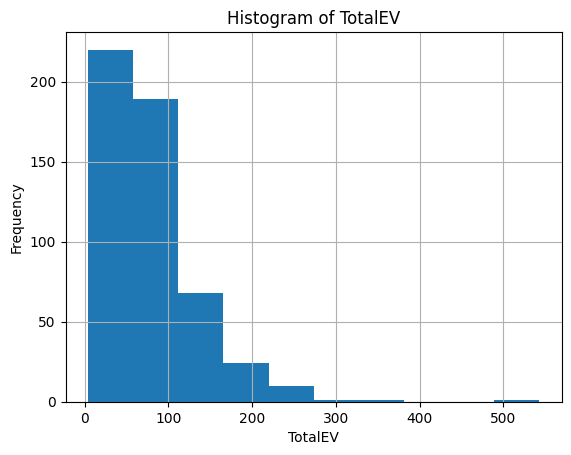

In [50]:
df['TotalEV'].hist(bins=10)
plt.xlabel('TotalEV')
plt.ylabel('Frequency')
plt.title('Histogram of TotalEV')
plt.show()

The TotalEV dispersion is right skewed and from the graph, we can infer that it is either poisson distributed or negative binomially distributed.

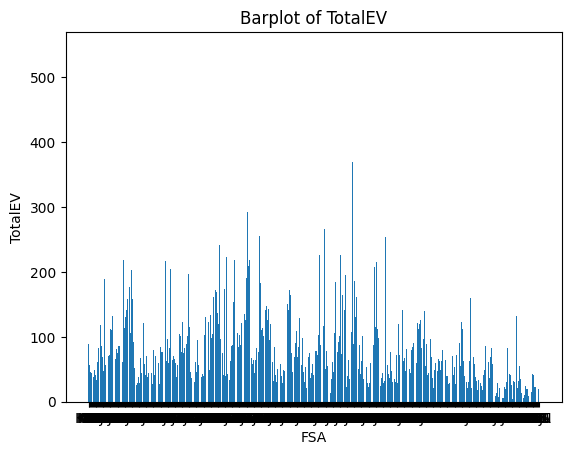

In [51]:
plt.bar(df["FSA"],df["TotalEV"])
plt.xlabel('FSA')
plt.ylabel('TotalEV')
plt.title('Barplot of TotalEV')
plt.show()

The way the graph has displayed the distribution of values is not
bad. The totalEV frequency is decreasing as the number of TotalEV is increasing

In [52]:
df.head()

FSA  med_fulltime_income  income_100k_up  med_total_household_income  \
0  K0A                74500        0.127076                      115000   
1  K0B                56800        0.063511                       79000   
2  K0C                58800        0.066429                       84000   
3  K0E                58000        0.063558                       83000   
4  K0G                64500        0.094451                       94000   

   income_40k  occup_cat_snr_mgmt  occup_cat_busfin  occup_ind_realestate  \
0    0.078879            0.009093          0.104232              0.007256   
1    0.098002            0.006422          0.083968              0.003806   
2    0.096143            0.004542          0.075798              0.004826   
3    0.102525            0.004162          0.070115              0.006558   
4    0.092569            0.006648          0.080904              0.008906   

   work_loc_home  work_loc_workplace  work_loc_notfixed  school_uni_degree  \
0       0.170659            0.267635           0.075341            0.14777   
1       0.099905            0.305661           0.068744           0.080875   
2       0.091317            0.306692           0.065578           0.079488   
3        0.07806            0.299629           0.069737           0.074907   
4       0.124931            0.264287           0.068988            0.11151   

   school_hs  commute_start_noon  edu_field_science  edu_field_bus_admin  \
0   0.131869            0.038477           0.013841              0.06916   
1   0.168411            0.050428           0.007136             0.052331   
2   0.150744             0.05744           0.007949             0.051383   
3   0.154733            0.045272           0.007062             0.055361   
4   0.138979            0.038382           0.010035             0.059455   

   edu_field_health  edu_field_pers_protect_transp  commute_transp_carpass  \
0          0.047794                        0.02598                0.021276   
1          0.045671                       0.026641                0.017602   
2          0.052141                       0.026212                0.020156   
3          0.048803                       0.034301                0.018412   
4          0.050173                       0.028097                0.021574   

   commute_start_6am  commute_start_9am     condo  worktype_selfemp  \
0           0.092004           0.026204  0.026865          0.082911   
1           0.086108           0.021646  0.037412          0.092531   
2           0.090465           0.024982  0.013868          0.076555   
3           0.098237           0.028374  0.008955          0.073772   
4           0.081531           0.029978  0.015713          0.089308   

   indigenous_ppl  married_ppl  work_loc_foreign  can_citizen_ppl  \
0        0.040895     0.554754          0.000806         0.971234   
1        0.031874     0.543292          0.000476         0.960514   
2        0.034161     0.538154          0.000852         0.967202   
3        0.031274     0.549825          0.001639         0.981614   
4        0.033992     0.564573          0.001631         0.970097   

   non_citizen_ppl    TotalEV TotalEV_Category  
0         0.015677  88.420261           Medium  
1         0.015224   56.61275           Medium  
2         0.013437  45.800371              Low  
3         0.013241  43.632879              Low  
4          0.01455  73.754453           Medium

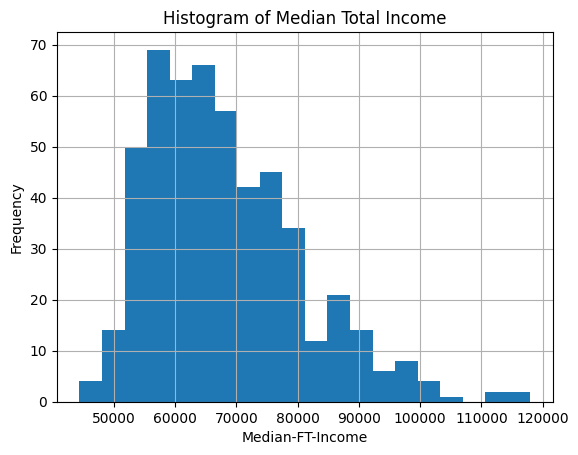

In [53]:
df['med_fulltime_income'].hist(bins=20)
plt.xlabel('Median-FT-Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Total Income')
plt.show()

- We see a graphical representation being a little right skewed but not much. It is not distinguishably bi-modal but there is a definite peak in the region near 55,000 median full time income.
- The bars in the right most end have some exceptionally high values. We must investigate if they are outliers or a data entry error

<Axes: >

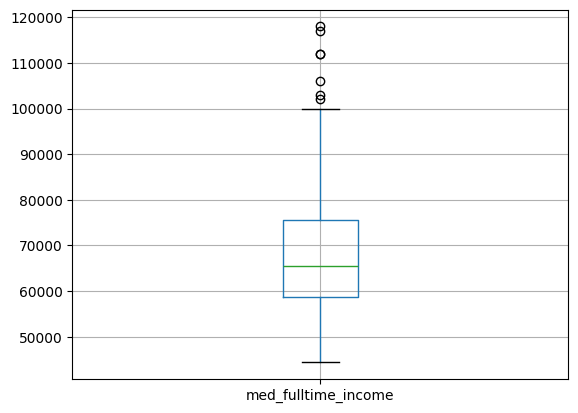

In [54]:
df.boxplot(column=['med_fulltime_income'])

Let's try to find out where the median total income is this high. We are trying to find out if this a legitimate data point or if this is some sort of data entry error.

In [56]:
df.sort_values(by='med_fulltime_income', ascending=False).head(10)

FSA  med_fulltime_income  income_100k_up  med_total_household_income  \
307  M5M               118000        0.265738                      164000   
41   K2R               117000        0.234438                      164000   
291  M4N               112000        0.272138                      146000   
330  M8X               112000         0.28238                      139000   
285  M4G               106000        0.257424                      130000   
185  L6J               103000        0.225635                      158000   
293  M4R               102000        0.240574                      107000   
19   K1M               100000        0.278681                      128000   
295  M4T               100000        0.281165                      114000   
284  M4E                98000        0.217289                      112000   

     income_40k  occup_cat_snr_mgmt  occup_cat_busfin  occup_ind_realestate  \
307    0.048833            0.030202          0.143361              0.026672   
41     0.060631             0.02021          0.121261              0.028294   
291    0.048885            0.032694          0.145099              0.022107   
330    0.055064            0.029179          0.128012               0.02212   
285    0.047709            0.025768          0.143892              0.021686   
185    0.053645            0.030917          0.129607              0.019247   
293     0.05542            0.021412          0.161642              0.023092   
19     0.052484            0.021437          0.096836              0.017002   
295    0.055652            0.028552          0.158246              0.026616   
284    0.056334            0.021591          0.136812              0.016292   

     work_loc_home  work_loc_workplace  work_loc_notfixed  school_uni_degree  \
307       0.240635            0.207688           0.023926           0.379094   
41        0.214228             0.19806            0.04042            0.25869   
291       0.230103            0.173745           0.017125           0.361191   
330       0.239552            0.193901           0.026355           0.343562   
285       0.262527            0.194663           0.027044           0.380141   
185       0.217854            0.183456           0.027846           0.326167   
293       0.294315            0.193971            0.02771           0.412713   
19        0.255027            0.181106           0.021437           0.374039   
295       0.288908            0.167441           0.018873           0.386663   
284       0.274212            0.194323           0.033369           0.350371   

     school_hs  commute_start_noon  edu_field_science  edu_field_bus_admin  \
307   0.058835            0.018827           0.019416             0.143558   
41    0.088925            0.016168           0.024252             0.056589   
291   0.042035            0.015569           0.015257              0.13389   
330    0.05177            0.019767           0.019296             0.114834   
285   0.055363             0.02041           0.021431             0.129095   
185   0.053235            0.023137           0.017813             0.142301   
293   0.051222            0.015534           0.022672             0.148207   
19    0.035482            0.014784           0.029568             0.092401   
295    0.04549            0.020809           0.017422             0.138405   
284   0.077729            0.029836           0.022769             0.104424   

     edu_field_health  edu_field_pers_protect_transp  commute_transp_carpass  \
307          0.056482                       0.006472                 0.01059   
41           0.032336                            0.0                0.032336   
291          0.045149                       0.005916                0.007473   
330           0.04471                       0.007059                0.011766   
285          0.052556                        0.00995                0.012756   
185          0.039312                       0.006143               

We see that M5M has the highest number of income. It is evident because, M5M represents Toronto, a pretty populous and developed city in terms of number of civilians. Hence we shall not consider this as an outlier.

In [57]:
#Selecting numeric columns to visualize outliers
numeric_columns = df.select_dtypes(include=["int", "float"]).columns
numeric_columns

Index(['med_fulltime_income', 'income_100k_up', 'med_total_household_income',
       'income_40k', 'occup_cat_snr_mgmt', 'occup_cat_busfin',
       'occup_ind_realestate', 'work_loc_home', 'work_loc_workplace',
       'work_loc_notfixed', 'school_uni_degree', 'school_hs',
       'commute_start_noon', 'edu_field_science', 'edu_field_bus_admin',
       'edu_field_health', 'edu_field_pers_protect_transp',
       'commute_transp_carpass', 'commute_start_6am', 'commute_start_9am',
       'condo', 'worktype_selfemp', 'indigenous_ppl', 'married_ppl',
       'work_loc_foreign', 'can_citizen_ppl', 'non_citizen_ppl', 'TotalEV'],
      dtype='object')

In [58]:
len(numeric_columns)

28

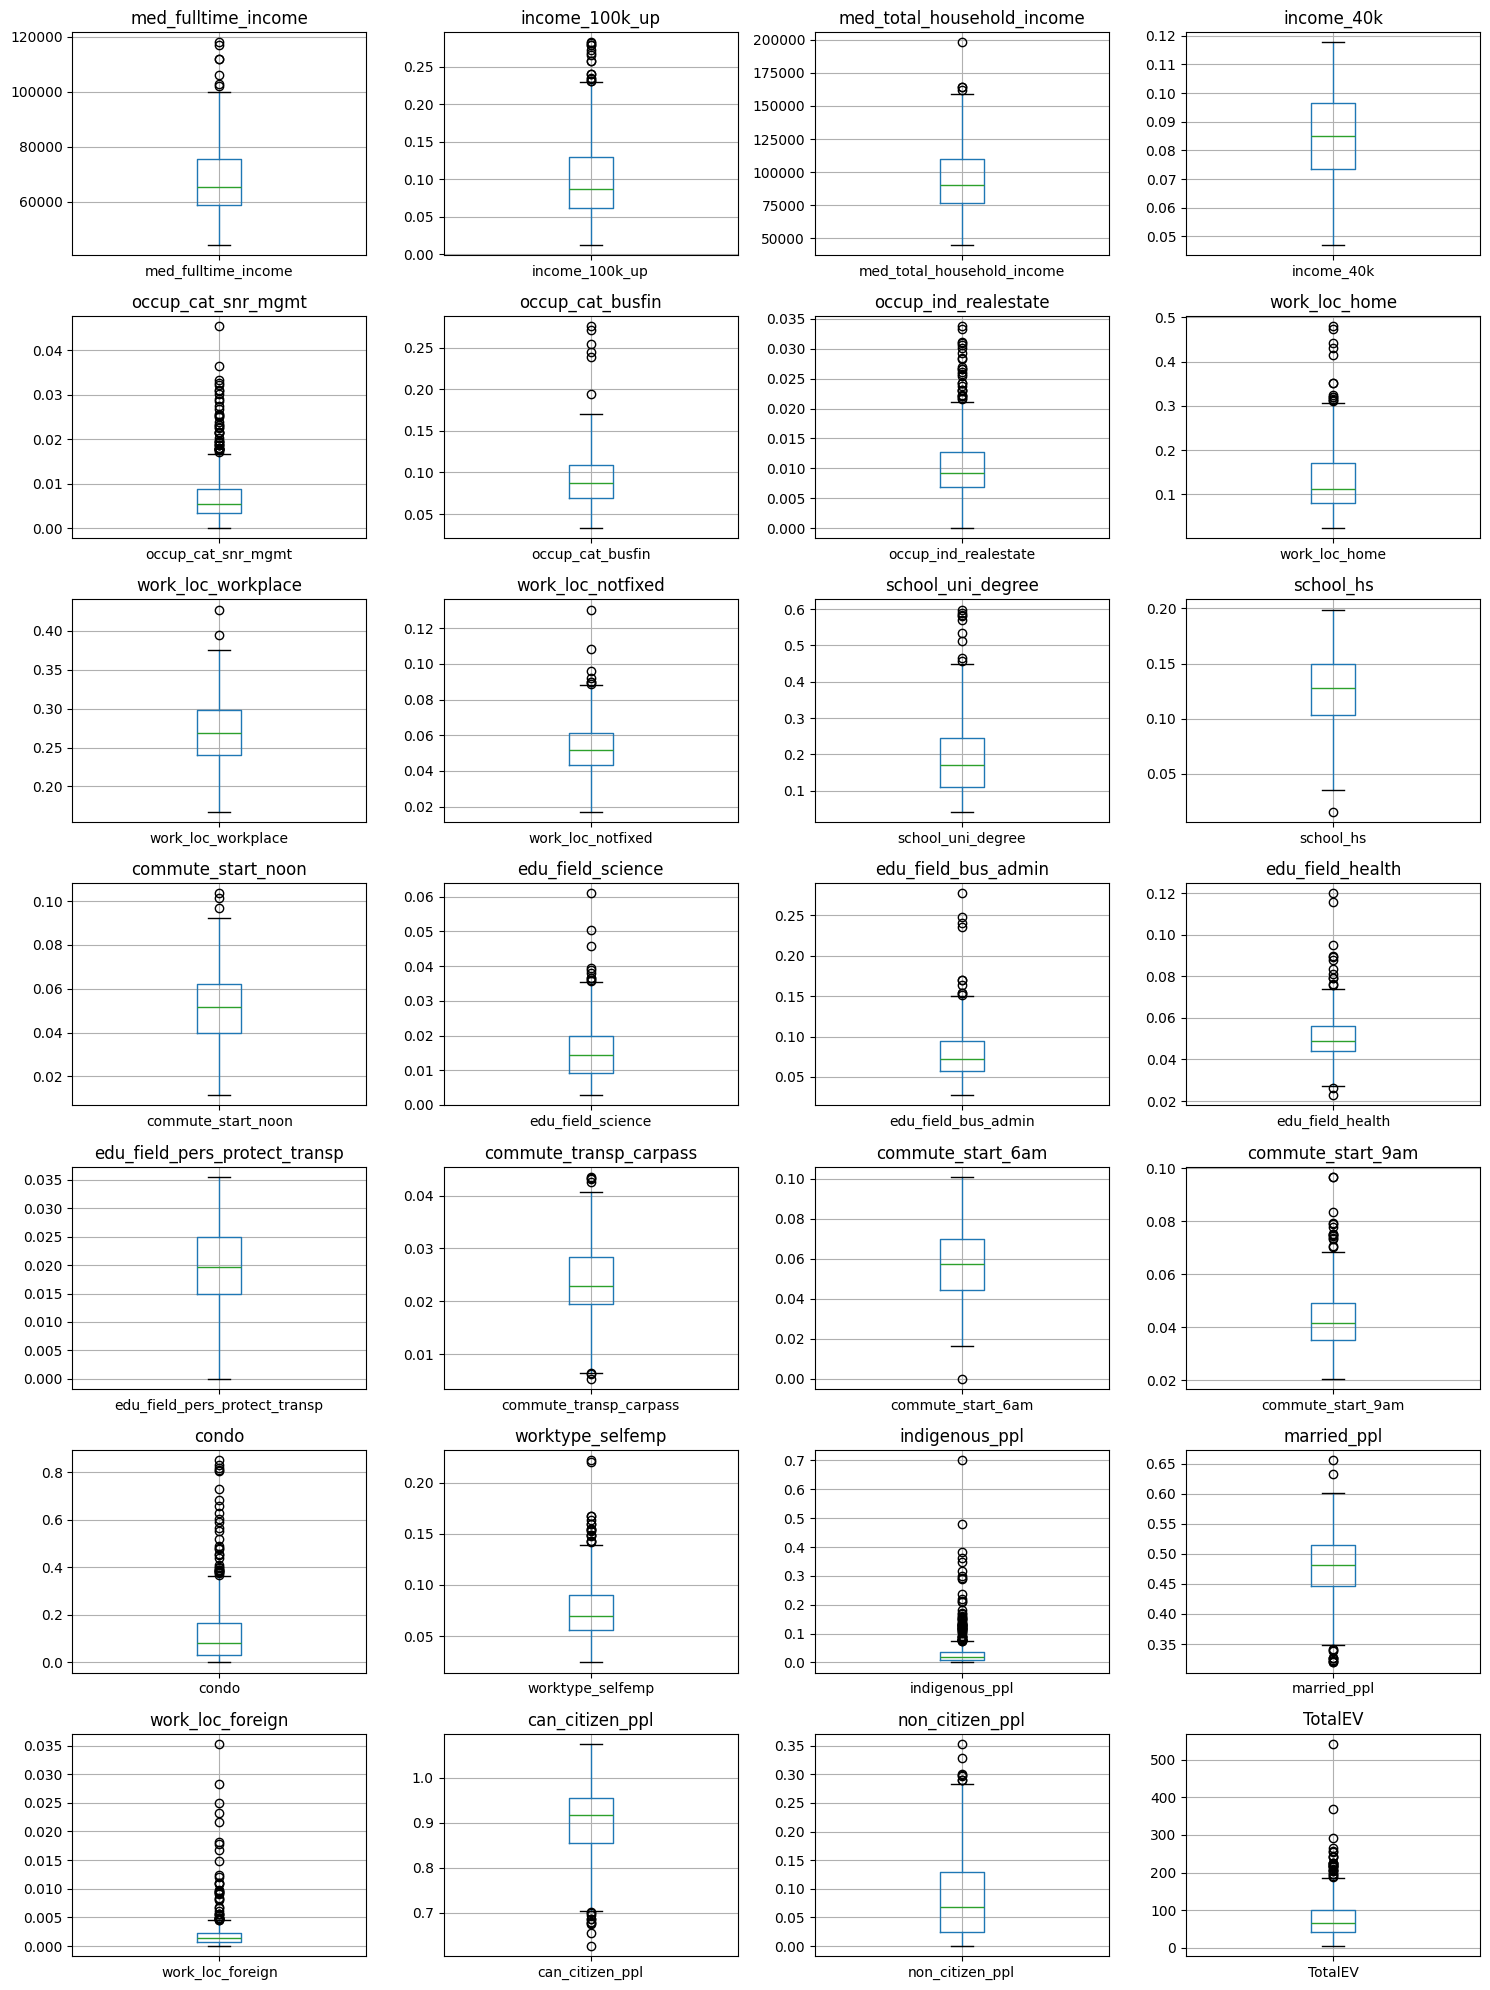

In [59]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

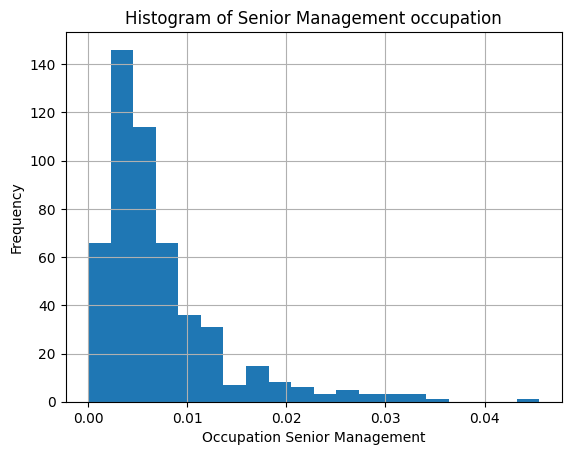

In [ ]:
df['occup_cat_snr_mgmt'].hist(bins=20)
plt.xlabel('Occupation Senior Management')
plt.ylabel('Frequency')
plt.title('Histogram of Senior Management occupation')
plt.show()

[0.033342050209205, 0.0364004044489383, 0.0455062571103526]


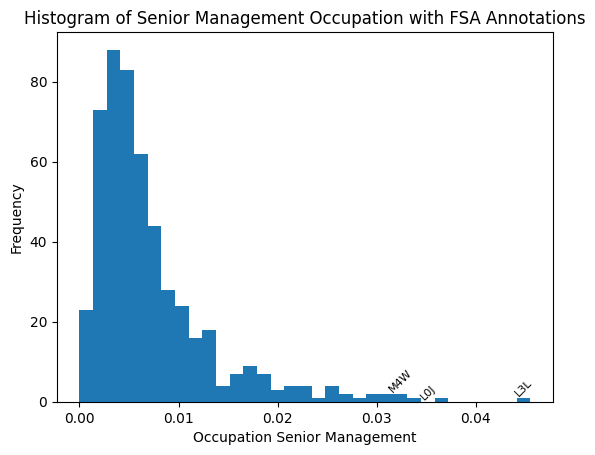

In [ ]:
# Step 1: Determine the Bin Ranges
last_three_values = sorted(df['occup_cat_snr_mgmt'].unique())[-3:]
print(last_three_values)

# Step 2: Create a Histogram and store the bin information
n, bins, patches = plt.hist(df['occup_cat_snr_mgmt'], bins='auto')  # 'auto' can be replaced with specific bin edges if required

# Step 3: Annotate the Histogram
# Find the center of each of the last five bins to place the text
for value in last_three_values:
    # Assuming that the value aligns exactly with a bin edge; otherwise, find the nearest bin
    bin_index = (np.abs(bins - value)).argmin() - 1  # Get the index of the bin to the left of the value
    bin_center = (bins[bin_index] + bins[bin_index + 1]) / 2
    bin_height = n[bin_index]

    # Get the corresponding FSA names for this bin
    fsa_names = df[df['occup_cat_snr_mgmt'] == value]['FSA'].unique()
    fsa_names_str = ", ".join(fsa_names)  # Concatenate FSA names into a single string

    # Annotate the histogram with FSA names
    plt.text(bin_center, bin_height, fsa_names_str, ha='center', va='bottom', fontsize=8, rotation=45)

plt.title('Histogram of Senior Management Occupation with FSA Annotations')
plt.xlabel('Occupation Senior Management')
plt.ylabel('Frequency')
plt.show()

1. **Distribution Shape**: The distribution of the 'Occupation Senior Management' variable appears to be right-skewed, with a majority of the data concentrated on the left side of the histogram.

2. **Common Values**: The highest frequency of Senior Management Occupation values is in the lower range (close to 0), indicating that higher percentages in this category are less common.

3. **Tail of the Distribution**: There is a long tail extending towards the right, which indicates that there are relatively few FSAs with a higher proportion of individuals in senior management roles.

4. **FSA Annotations**: Annotations on the histogram indicate specific FSAs associated with the higher end of the distribution. These FSAs are likely those with the highest proportion of individuals in senior management occupations, and they stand out from the general trend.

5. **Outliers**: The presence of FSAs with a higher proportion at the tail end could also indicate potential outliers, or it could simply reflect areas with an unusually high concentration of senior management occupations.

6. **Analysis Focus**: The annotations indicate specific areas of interest that may warrant further investigation. For example, why do these FSAs have a higher proportion of senior management occupations? This could be related to various factors like the presence of corporate headquarters, higher economic activity, or a different industrial mix compared to other FSAs.

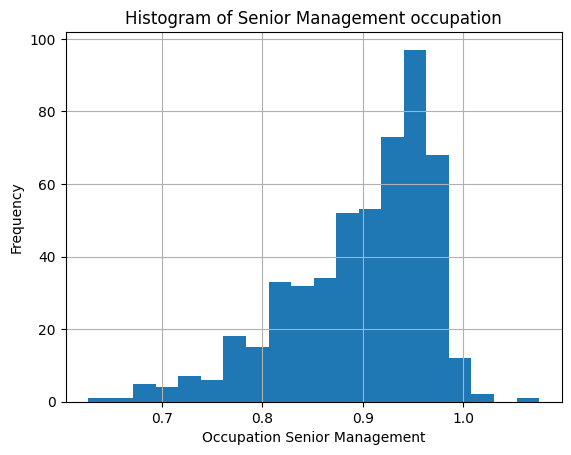

In [60]:
df['can_citizen_ppl'].hist(bins=20)
plt.xlabel('Occupation Senior Management')
plt.ylabel('Frequency')
plt.title('Histogram of Senior Management occupation')
plt.show()

## Categorizing the TotalEV and Clustering Similar Features with TotalEV



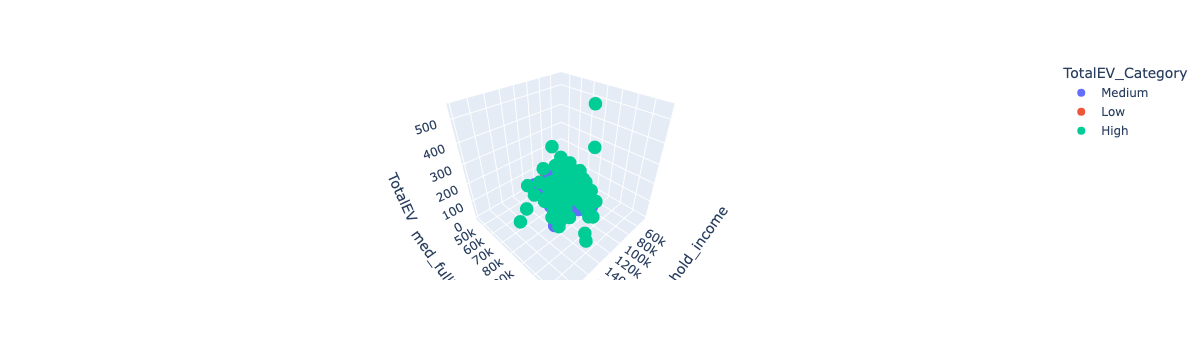

In [61]:
fig = px.scatter_3d(df, z='TotalEV', y='med_fulltime_income', x='med_total_household_income',color='TotalEV_Category')
fig.show()


- **Correlation**: There seems to be a positive correlation between `med_total_household_income` and `TotalEV`, as well as between `med_fulltime_income` and `TotalEV`. This suggests that as median incomes increase, the `TotalEV` also tends to increase.

- **Income Disparity**: The spread along the `med_fulltime_income` axis appears to be less pronounced than along the `med_total_household_income`, which might indicate less variability in full-time income as compared to household income.

- **Data Density**: The data points are more concentrated in the lower to middle income brackets for both `med_total_household_income` and `med_fulltime_income`, which suggests that there are fewer data points (FSAs or regions) with very high incomes.

- **Outliers**: There are some outliers, particularly visible in the `TotalEV` dimension (points that are much higher than the main cluster of data), indicating some FSAs or regions with significantly higher values of `TotalEV`.

<Axes: xlabel='condo', ylabel='TotalEV'>

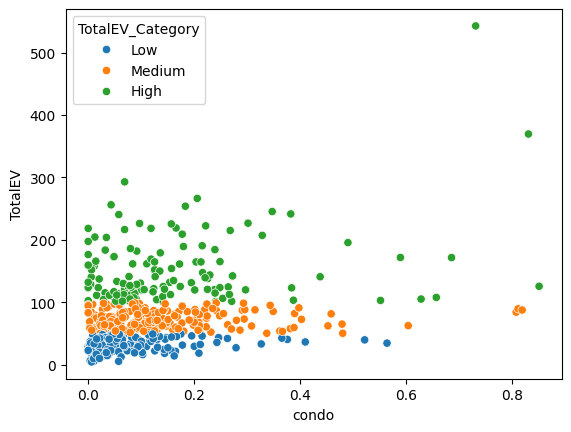

In [62]:
sns.scatterplot(x=df["condo"], y=df["TotalEV"], hue=df['TotalEV_Category'])

From this graph, several inferences can be made:

1. **Positive Correlation**: There appears to be a positive correlation between the 'condo' metric and 'TotalEV'. As the 'condo' metric increases, 'TotalEV' also tends to increase.

2. **Category Distribution**: The 'TotalEV_Category' shows that most of the low and medium categories are clustered at the lower end of the 'condo' metric. In contrast, the high category is more spread out and appears more frequently at higher 'condo' values.

3. **Concentration of Categories**: There's a higher concentration of low and medium 'TotalEV' categories in the lower range of the 'condo' metric. The high 'TotalEV' category seems to be more scattered and less dense, which might suggest that high 'TotalEV' values occur less frequently or are less tightly correlated with the 'condo' metric.

4. **Data Density**: The majority of the data points are clustered in the lower left corner of the plot, indicating a high density of lower 'TotalEV' values associated with lower 'condo' metric values.

5. **Outliers**: A few data points in the high 'TotalEV' category stand out significantly above the general trend. These could be outliers or indicate specific instances where the 'TotalEV' is exceptionally high relative to the 'condo' metric.

6. **Potential Ceiling Effect**: There might be a ceiling effect visible for the 'condo' metric, as there are a number of high 'TotalEV' points that line up along specific 'condo' values.


<Axes: xlabel='work_loc_home', ylabel='TotalEV'>

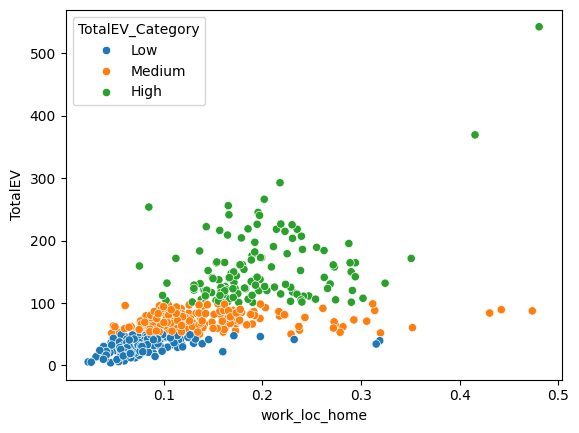

In [63]:
sns.scatterplot(x=df["work_loc_home"], y=df["TotalEV"], hue=df['TotalEV_Category'])

<Axes: xlabel='school_uni_degree', ylabel='TotalEV'>

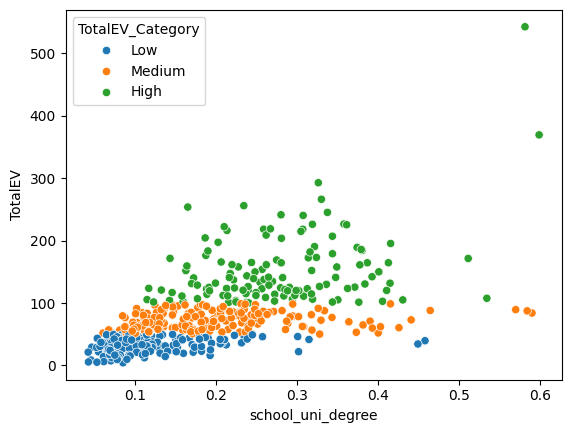

In [64]:
sns.scatterplot(x=df["school_uni_degree"], y=df["TotalEV"], hue=df['TotalEV_Category'])

<Axes: xlabel='commute_transp_carpass', ylabel='TotalEV'>

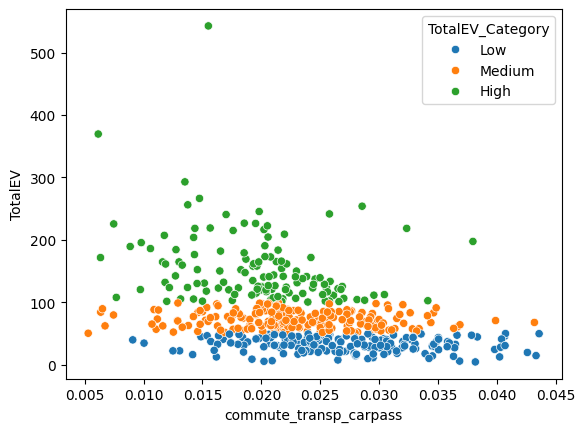

In [65]:
sns.scatterplot(x=df["commute_transp_carpass"], y=df["TotalEV"], hue=df['TotalEV_Category'])

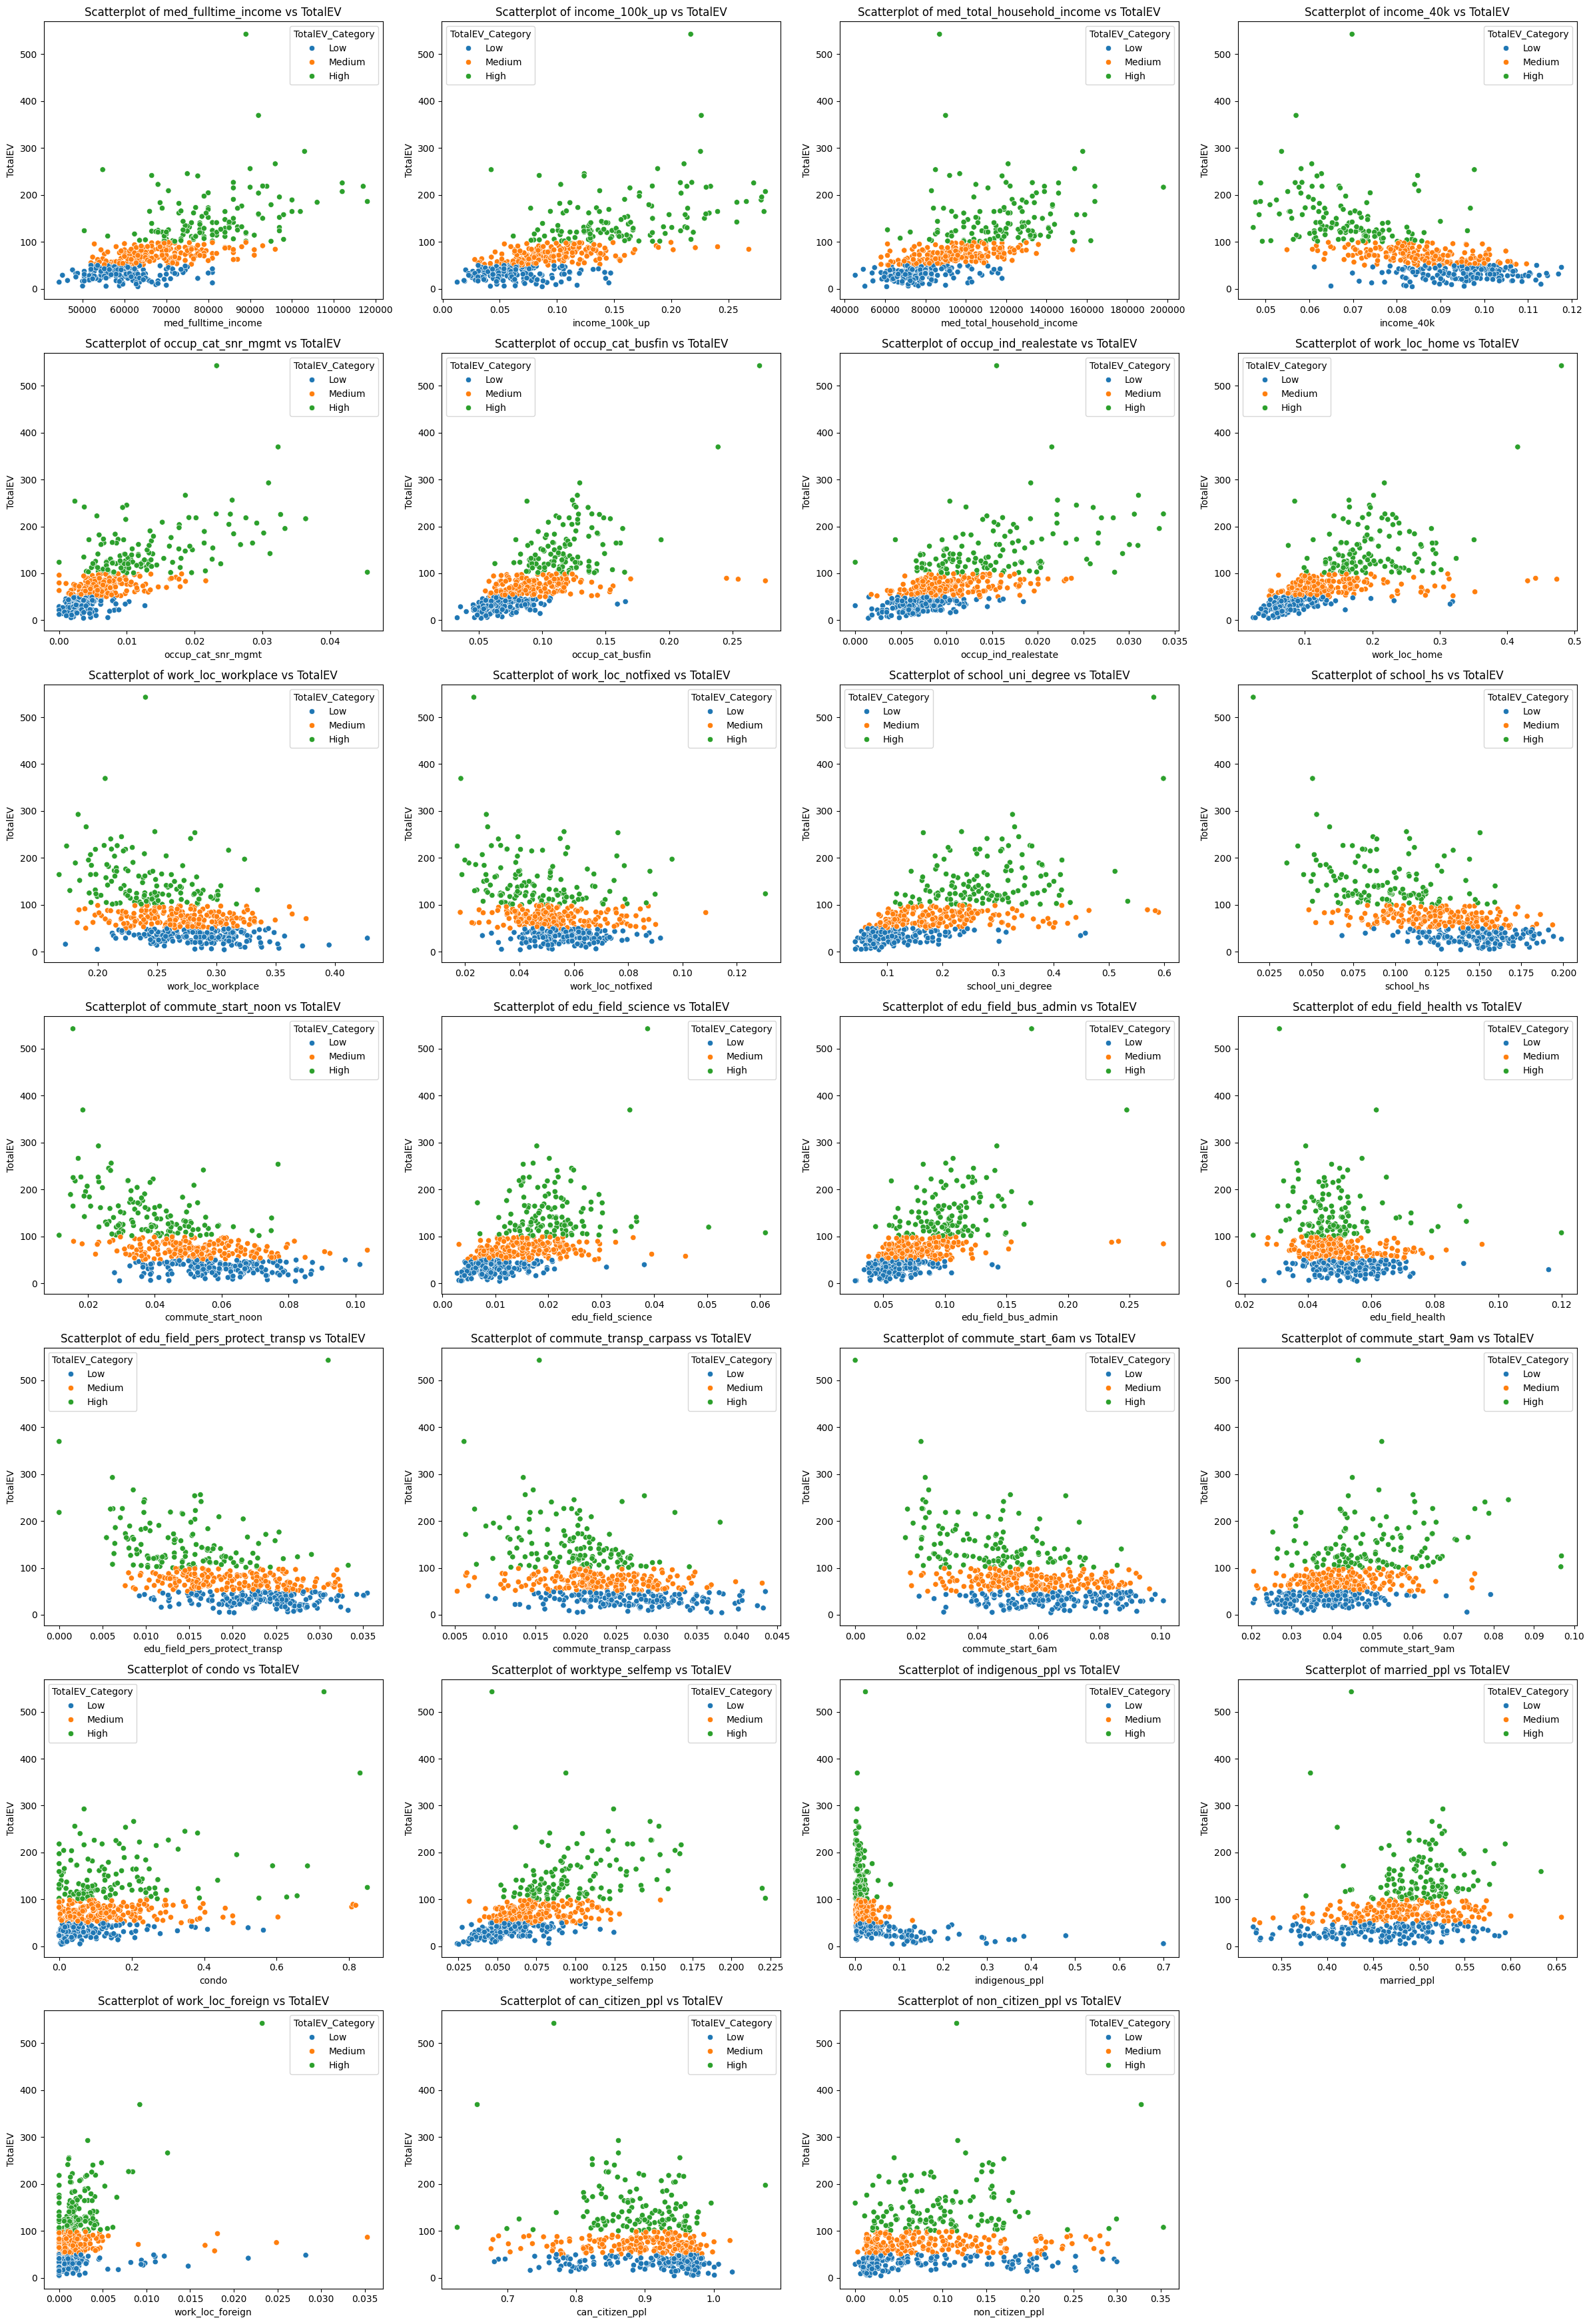

In [66]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('TotalEV')

n_cols = 4
n_rows = 7


fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))


axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Select the axis for the current plot
    ax = axes[i]

    # Create the scatterplot on the selected axis
    sns.scatterplot(data=df, x=col, y="TotalEV", hue="TotalEV_Category", ax=ax)

    # Set the title for the subplot
    ax.set_title(f'Scatterplot of {col} vs TotalEV')

# If there are any remaining empty subplots, hide them
for j in range(i + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

# Adjust layout for better fit and to prevent label overlap
fig.tight_layout()

plt.show()


From the image of the scatter plots provided, here are some insights we could infer:

1. **Income and TotalEV Relationship**: The scatter plots generally indicate that there is a positive relationship between median full-time income, median total household income, and the proportion of income above $100k and $40k, with the 'TotalEV' metric. This suggests that as income increases, the 'TotalEV' also tends to be higher.

2. **Concentration of Categories**: For all the plots, the 'Low' and 'Medium' TotalEV categories seem to be more densely packed and primarily found in the lower range of the respective income metrics. The 'High' TotalEV category points, while less frequent, appear across a wider range of income values but tend to cluster more towards the higher end of the income metrics.

3. **Senior Management Occupation**: For the scatter plot with 'occup_cat_snr_mgmt' (senior management occupation), it looks like the higher the percentage of individuals in senior management, the higher the 'TotalEV'. However, there's a lot of overlap between the 'Low' and 'Medium' categories.

4. **Business and Finance Occupation**: Similar to senior management, the 'occup_cat_busfin' (business and finance occupation) scatter plot shows that areas with a higher percentage in these occupations might have higher 'TotalEV', but again with significant overlap in 'Low' and 'Medium' categories.

5. **Real Estate Occupation**: The 'occup_ind_realestate' scatter plot suggests a clear correlation with 'TotalEV' compared to full-time and household income, with a relatively even spread across the 'TotalEV' categories, although still with a tendency for higher 'TotalEV' at higher percentages in real estate occupations.

6. **Work from Home**: The 'work_loc_home' plot is interesting; it shows a concentration of 'High' TotalEV values at the lower range of the 'work_loc_home' metric. This could indicate that the ability to work from home is not as strongly associated with higher 'TotalEV' as the other financial metrics.

7. **Outliers**: There are a few outlier points with very high 'TotalEV' values across the plots. These outliers could represent specific areas or circumstances where 'TotalEV' is particularly high and are worth investigating further.

8. **Data Spread**: There's a notable spread of the 'TotalEV' values at higher income levels in several plots, which suggests that while income may be a good indicator of 'TotalEV', there are likely other factors at play influencing the 'TotalEV'.

9. **Real Estate Variables**: Variables such as 'work_loc_home' and 'condo' indicate a relationship with 'TotalEV'. It’s possible that regions with higher work-from-home rates and more condos have higher 'TotalEV', but this might reflect a broader socioeconomic status.

10. **Education Variables**: There are plots for 'school_uni_degree', 'school_hs', 'edu_field_science', 'edu_field_bus_admin', and 'edu_field_health'. These suggest varying degrees of correlation with 'TotalEV'. For instance, areas with higher proportions of university degrees or certain fields of study might have higher 'TotalEV'.

11. **Commuting Variables**: The variables related to commuting, such as 'commute_start_6am', 'commute_start_9am', and 'commute_start_noon', might reflect lifestyle or regional differences that correlate with 'TotalEV'.

12. **Demographic Variables**: Scatter plots for 'indigenous_ppl', 'married_ppl', 'work_loc_foreign', 'can_citizen_ppl', and 'non_citizen_ppl' indicate how different demographic factors might be associated with 'TotalEV'. For example, regions with a higher proportion of married people or Canadian citizens may have different 'TotalEV' profiles.

13. **Distribution of TotalEV Categories**: The distribution of 'Low', 'Medium', and 'High' TotalEV categories varies across different variables, indicating complex socioeconomic factors at play.

14. **Density and Clustering**: There is a noticeable density of data points in certain ranges for each variable, with clustering around certain trends. This could inform targeted analyses or interventions.

These plots could serve as a basis for further analysis, such as looking into what makes the 'High' 'TotalEV' areas unique or understanding the role of occupation type in 'TotalEV'. It's also evident that income is an important but not sole factor in determining 'TotalEV', pointing to the multifaceted nature of this metric.

## Data Normalization Pipeline (Various Methods)

To prepare the dataset for input into the machine learning model, we must normalize the data points. Below is code that stores different normalized data in dictionaries as key-value pairs.

In [67]:
len(df)

514

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

X = df.drop(['TotalEV', 'TotalEV_Category','FSA'], axis=1)  # Features
y = df[["TotalEV_Category"]]  # Target variable, which we will not normalize

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #We are using the stratify method here such that

# Dictionary of different scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer()
}

# Initialize a dictionary to hold the scaled dataframes
scaled_dataframes = {}

# Apply each scaler
for scaler_name, scaler in scalers.items():
    # Fit on training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back into DataFrames
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    # Add the target feature back to the scaled DataFrames
    train_scaled_df = X_train_scaled_df.join(y_train)
    test_scaled_df = X_test_scaled_df.join(y_test)

    # Store the scaled dataframes in the dictionary
    scaled_dataframes[scaler_name + '_train'] = train_scaled_df
    scaled_dataframes[scaler_name + '_test'] = test_scaled_df

# Now we have each version of scaled dataframes stored in 'scaled_dataframes' dictionary.


In [69]:
scaled_dataframes.keys() #Different normalization methods we have used stored in the keys of the dictionary.

dict_keys(['MinMaxScaler_train', 'MinMaxScaler_test', 'StandardScaler_train', 'StandardScaler_test', 'RobustScaler_train', 'RobustScaler_test', 'Normalizer_train', 'Normalizer_test'])

In [71]:
scaled_dataframes['MinMaxScaler_train'].head(15)

med_fulltime_income  income_100k_up  med_total_household_income  \
187             0.660326        0.635894                    0.502618   
491             0.436141        0.464081                    0.260471   
429             0.081522        0.310776                    0.325916   
315             0.233696        0.333799                    0.267016   
192             0.141304        0.079998                    0.247382   
494             0.375000        0.398397                    0.404450   
516             0.250000        0.257503                    0.240838   
264             0.286685        0.286157                    0.299738   
412             0.184783        0.169048                    0.211387   
314             0.211957        0.187278                    0.178665   
310             0.510870        0.769533                    0.267016   
285             0.836957        0.911557                    0.554974   
136             0.293478        0.303735                    0.312827   
417             0.103261        0.086828                    0.120419   
391             0.222826        0.193080                    0.247382   

     income_40k  occup_cat_snr_mgmt  occup_cat_busfin  occup_ind_realestate  \
187    0.278524            0.421019          0.362615              0.484679   
491    0.526293            0.124464          0.243228              0.277972   
429    0.694863            0.000000          0.223233              0.000000   
315    0.521518            0.157877          0.298125              0.588617   
192    0.704160            0.038831          0.272256              0.317986   
494    0.681871            0.055075          0.272632              0.187921   
516    0.604590            0.119915          0.144531              0.119028   
264    0.370688            0.098623          0.293047              0.576871   
412    0.767529            0.114665          0.154173              0.284542   
314    0.551017            0.093281          0.251577              0.475747   
310    0.283867            0.524273          0.497427              0.772787   
285    0.007592            0.566250          0.500795              0.650407   
136    0.332011            0.145178          0.343288              0.517106   
417    0.807304            0.055038          0.140733              0.237874   
391    0.713503            0.098053          0.184788              0.217468   

     work_loc_home  work_loc_workplace  work_loc_notfixed  school_uni_degree  \
187       0.359939            0.169711           0.161952           0.414859   
491       0.210414            0.495851           0.198658           0.329650   
429       0.237971            0.438887           1.000000           0.137463   
315       0.234973            0.327053           0.335822           0.363419   
192       0.134592            0.506822           0.421196           0.228999   
494       0.127692            0.618542           0.357405           0.066523   
516       0.034142            0.657014           0.417796           0.087691   
264       0.316926            0.116274           0.225960           0.478903   
412       0.132546            0.557202           0.298744           0.075621   
314       0.241397            0.353495           0.355405           0.361932   
310       0.594917            0.135543           0.113257           0.679672   
285       0.531131            0.104661           0.087486           0.623561   
136       0.307255            0.119172           0.203562           0.371627   
417       0.146881            0.494120           0.409842           0.216528   
391       0.122224            0.556576           0.291725           0.110095   

     school_hs  commute_start_noon  edu_field_science  edu_field_bus_admin  \
187   0.257668            0.229058           0.241255             0.396296   
491   0.315389            0.419097           0.468758             0.183929   
429   0.685160            0.484201           0.225194             0.1329

## Modelling

In [72]:
df_train_minmax = scaled_dataframes['MinMaxScaler_train'] #we are storing the min-max train data points into a variable
df_test_minmax = scaled_dataframes['MinMaxScaler_test'] #we are storing the min-max test data points into a variable

In [73]:
len(df_train_minmax) #we are checking the number of rows in the train dataset

359

In [74]:
print(df_train_minmax.isna().sum())

med_fulltime_income              0
income_100k_up                   0
med_total_household_income       0
income_40k                       0
occup_cat_snr_mgmt               0
occup_cat_busfin                 0
occup_ind_realestate             0
work_loc_home                    0
work_loc_workplace               0
work_loc_notfixed                0
school_uni_degree                0
school_hs                        0
commute_start_noon               0
edu_field_science                0
edu_field_bus_admin              0
edu_field_health                 0
edu_field_pers_protect_transp    0
commute_transp_carpass           0
commute_start_6am                0
commute_start_9am                0
condo                            0
worktype_selfemp                 0
indigenous_ppl                   0
married_ppl                      0
work_loc_foreign                 0
can_citizen_ppl                  0
non_citizen_ppl                  0
TotalEV_Category                 0
dtype: int64


In [75]:
print(df_test_minmax.isna().sum())

med_fulltime_income              0
income_100k_up                   0
med_total_household_income       0
income_40k                       0
occup_cat_snr_mgmt               0
occup_cat_busfin                 0
occup_ind_realestate             0
work_loc_home                    0
work_loc_workplace               0
work_loc_notfixed                0
school_uni_degree                0
school_hs                        0
commute_start_noon               0
edu_field_science                0
edu_field_bus_admin              0
edu_field_health                 0
edu_field_pers_protect_transp    0
commute_transp_carpass           0
commute_start_6am                0
commute_start_9am                0
condo                            0
worktype_selfemp                 0
indigenous_ppl                   0
married_ppl                      0
work_loc_foreign                 0
can_citizen_ppl                  0
non_citizen_ppl                  0
TotalEV_Category                 0
dtype: int64


In [76]:
df_train_minmax.iloc[:,-1].value_counts()

TotalEV_Category
Medium    141
Low       128
High       90
Name: count, dtype: int64

In [77]:
df_test_minmax.iloc[:,-1].value_counts()

TotalEV_Category
Medium    61
Low       55
High      39
Name: count, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score

# Splitting features and target
X_train = df_train_minmax.iloc[:, :-1]
y_train = df_train_minmax.iloc[:, -1]
X_test = df_test_minmax.iloc[:, :-1]
y_test = df_test_minmax.iloc[:, -1]

# print(X_train).head(1)
# print(y_train).head(1)

### Label Encoding of Dependent Variable

In [84]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_train_minmax and df_test_minmax are your dataframes
# and the target feature is the last column

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder on the target feature to learn the mapping
# Concatenate train and test target columns to ensure consistency
all_targets = pd.concat([df_train_minmax.iloc[:, -1], df_test_minmax.iloc[:, -1]])
le.fit(all_targets)

# Transform the target feature in both the training and test sets
y_train_encoded = le.transform(df_train_minmax.iloc[:, -1])
y_test_encoded = le.transform(df_test_minmax.iloc[:, -1])

# Now we can proceed to train your model with y_train_encoded and y_test_encoded as the target variables


Label encoding is essential for converting categorical target variables into numerical representations, allowing machine learning models to process them effectively. In our dataset, the target variable had three categories: High, Medium, and Low. Label encoding assigns unique numerical labels to each category (e.g., 0 for Low, 1 for Medium, 2 for High), facilitating model training. This encoding ensures compatibility with classification algorithms, enabling accurate predictions based on the transformed target variable. By encoding categorical labels, we ensure that the model can interpret and learn from the target variable's information during training, enhancing predictive performance.

### Decision tree classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initializing and training the decision tree model
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")


Decision Tree Accuracy: 0.7290322580645161


### Random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing and training the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")

Random Forest Accuracy: 0.8064516129032258


### XGradient Boost Classifier

In [88]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 1.2 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 824.0 kB/s eta 0:00:0000:010:05m


In [89]:
import xgboost as xgb

# Fit with XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=40)
xgb_model.fit(X_train, y_train_encoded)

# Predicting and evaluating the model
y_pred = xgb_model.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test_encoded, y_pred)}")

Gradient Boosting Accuracy: 0.8258064516129032


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

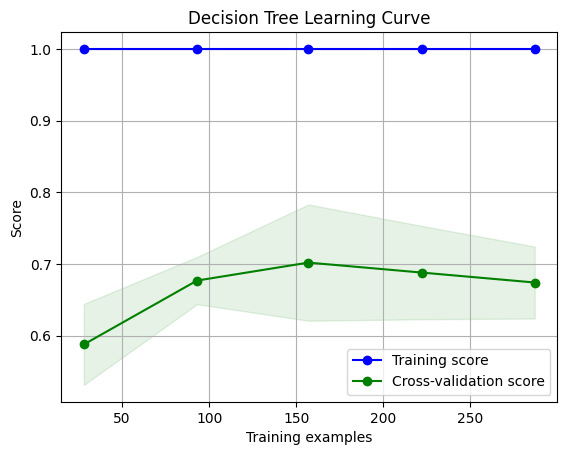

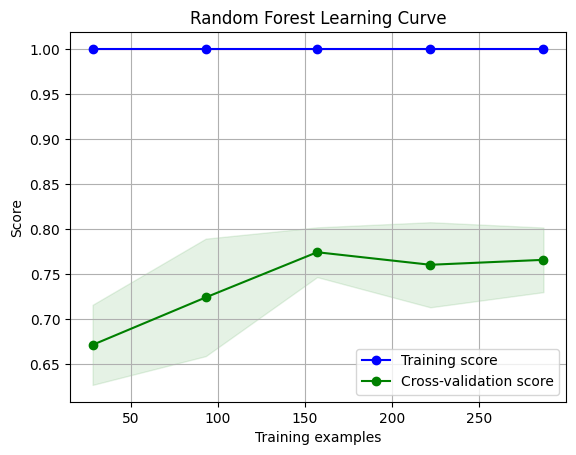

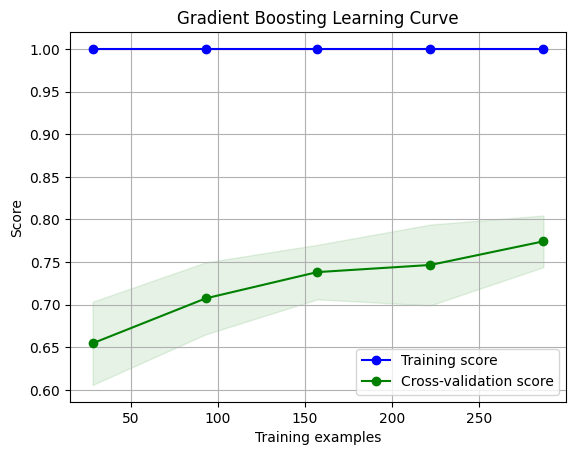

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming X and y are your features and target variable for the whole dataset
X, y = df_train_minmax.iloc[:, :-1], df_train_minmax.iloc[:, -1]

# Plot learning curves for each model
plot_learning_curve(DecisionTreeClassifier(random_state=42), "Decision Tree Learning Curve", X, y, cv=5)
plot_learning_curve(RandomForestClassifier(random_state=42), "Random Forest Learning Curve", X, y, cv=5)
plot_learning_curve(GradientBoostingClassifier(random_state=42), "Gradient Boosting Learning Curve", X, y, cv=5)

plt.show()


# Modelling with GridSearchCV

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Fit with decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to do cross validation and find the the best hyperparameters
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_decisionTree = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_decisionTree.fit(X_train, y_train)

print("Best parameters found: ", grid_search_decisionTree.best_params_)
print("Best accuracy on cross validation set: ", grid_search_decisionTree.best_score_)

Best parameters found:  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy on cross validation set:  0.7020344287949921


In [93]:
# Use the best hyperparameters to get the best model and fit to the test dataset.
best_decisionTree = grid_search_decisionTree.best_estimator_
best_decisionTree.fit(X_train, y_train)
y_pred_decisionTree = best_decisionTree.predict(X_test)

# Output the accuracy and classification report
accuracy_decisionTree = accuracy_score(y_test, y_pred_decisionTree)
report_decisionTree = classification_report(y_test, y_pred_decisionTree)
print("Accuracy of DecisionTree on test set:", accuracy_decisionTree)
print("Classification Report of DecisionTree:")
print(report_decisionTree)

Accuracy of DecisionTree on test set: 0.7290322580645161
Classification Report of DecisionTree:
              precision    recall  f1-score   support

        High       0.74      0.59      0.66        39
         Low       0.86      0.80      0.83        55
      Medium       0.63      0.75      0.69        61

    accuracy                           0.73       155
   macro avg       0.74      0.71      0.72       155
weighted avg       0.74      0.73      0.73       155



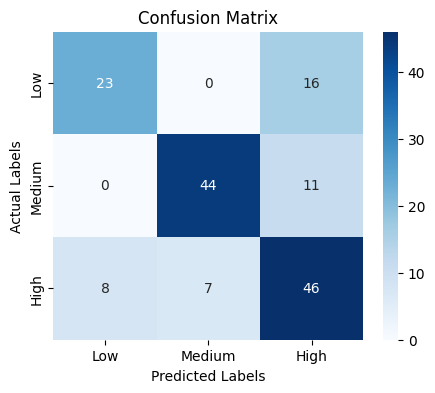

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for a nicer visualization (optional)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_decisionTree)

cm_df = pd.DataFrame(cm, index=[i for i in ['Low', 'Medium', 'High']], columns=[i for i in ['Low', 'Medium', 'High']])

# Plotting
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


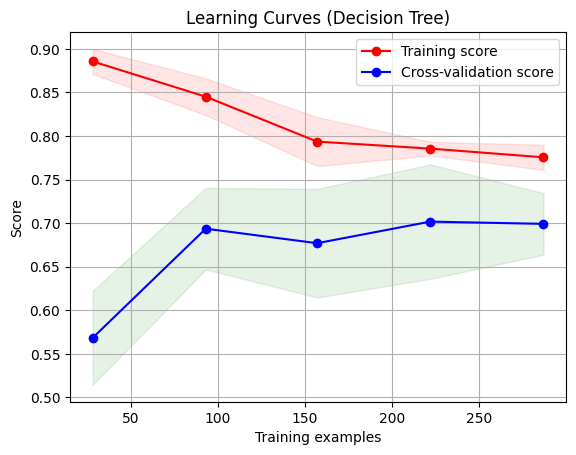

In [95]:
# learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree)"
cv = 5
plot_learning_curve(best_decisionTree, title, X_train, y_train, cv=cv)
plt.show()


### XGBOOST with GridCV

In [96]:
import xgboost as xgb

# Fit with XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Use GridSearchCV to do cross validation and find the the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy on cross validation set: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best accuracy on cross validation set:  0.7938184663536776


In [99]:
# Use the best hyperparameters to get the best model and fit to the test dataset.
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train_encoded)
y_pred_xgBoost = best_xgb_model.predict(X_test)

# Output the accuracy and classification report
accuracy_xgBoost = accuracy_score(y_test_encoded, y_pred_xgBoost)
report_xgBoost = classification_report(y_test_encoded, y_pred_xgBoost)
print("Accuracy of XGBoost on test set:", accuracy_xgBoost)
print("Classification Report of XGBoost:")
print(report_xgBoost)

Accuracy of XGBoost on test set: 0.832258064516129
Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.85      0.96      0.91        55
           2       0.83      0.74      0.78        61

    accuracy                           0.83       155
   macro avg       0.83      0.83      0.83       155
weighted avg       0.83      0.83      0.83       155



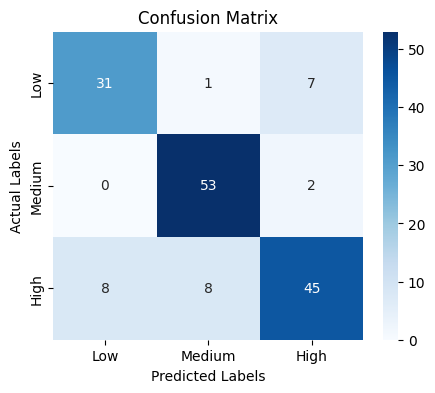

In [100]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for a nicer visualization (optional)

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgBoost)

cm_df = pd.DataFrame(cm, index=[i for i in ['Low', 'Medium', 'High']], columns=[i for i in ['Low', 'Medium', 'High']])

# Plotting
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


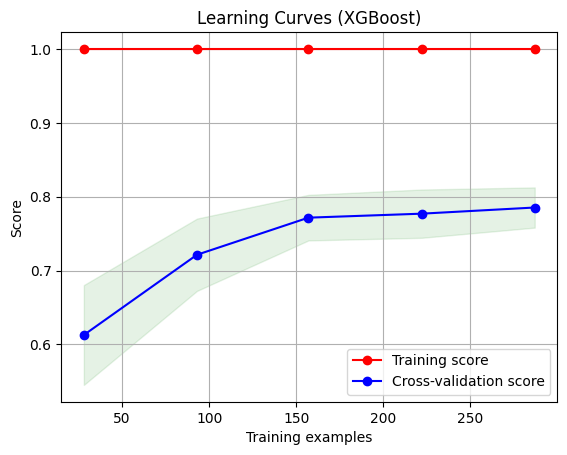

In [101]:
# learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

title = "Learning Curves (XGBoost)"
cv = 5
plot_learning_curve(best_xgb_model, title, X_train, y_train_encoded, cv=cv)
plt.show()

### Random forest with Grid CV

In [ ]:
# Fit with Random Forest Model
rf_clf = RandomForestClassifier(random_state=40)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to do cross validation and find the the best hyperparameters

grid_search_randomForest = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_randomForest.fit(X_train, y_train)

print("Best parameters found: ", grid_search_randomForest.best_params_)
print("Best accuracy on cross validation set: ", grid_search_randomForest.best_score_)

In [ ]:
# Use the best hyperparameters to get the best model and fit to the test dataset.
best_randomForest_model = grid_search_randomForest.best_estimator_
best_randomForest_model.fit(X_train, y_train)
y_pred_randomForest = best_randomForest_model.predict(X_test)

# Output the accuracy and classification report
accuracy_randomForest = accuracy_score(y_test, y_pred_randomForest)
report_randomForest = classification_report(y_test, y_pred_randomForest)
print("Accuracy of Random Forest on test set:", accuracy_randomForest)
print("Classification Report of Random Forest:")
print(report_randomForest)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for a nicer visualization (optional)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_randomForest)

cm_df = pd.DataFrame(cm, index=[i for i in ['Low', 'Medium', 'High']], columns=[i for i in ['Low', 'Medium', 'High']])

# Plotting
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
# learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
cv = 5
plot_learning_curve(best_randomForest_model, title, X_train, y_train, cv=cv)
plt.show()

In [ ]:
train_preds = X_train
train_preds['prediction'] = best_randomForest_model.predict(X_train)
train_preds['group'] = "train"

test_preds = X_test
test_preds['prediction'] = best_randomForest_model.predict(X_test)
test_preds['group'] = "test"

In [ ]:
full_preds = pd.concat([train_preds, test_preds])
full_preds['FSA'] = df['FSA']

full_preds[['FSA','group','prediction']].to_csv("preds.csv")